<a href="https://colab.research.google.com/github/naveen312/DS-BY-NAVEEN/blob/main/Logistic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [201]:

# Importing Data
bank = pd.read_csv("/content/bank-full.csv",sep=";")

In [202]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [204]:
bank = bank.rename({'y':'Target'},axis=1)

In [205]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [206]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There is no null values there is no empty cells in data

In [207]:
#data summary
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [208]:
bank.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [209]:
bank.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [210]:
#splitting dataset into two parts numeric and categoric
df_num = df.select_dtypes(['int64','float64'])
df_cat = df.select_dtypes(object)

In [211]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [212]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [213]:
#Converting categorical data into Numeric data
# Use label encoding
from sklearn.preprocessing import LabelEncoder

In [214]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [215]:
df_cat.dtypes

job          int64
marital      int64
education    int64
default      int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
y            int64
dtype: object

In [216]:
#after applying label cncoder let's concentrate on df_cat and df_num.
banknew = pd.concat([df_num,df_cat],axis = 1)

In [217]:
banknew.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [218]:
#Checking for corellation 
banknew.corr()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,-0.042357,0.007367,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.018232,0.002122,0.064514,-0.066745,-0.068768,-0.084350,-0.027273,0.019777,-0.020967,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,-0.006028,0.083460,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.004744,0.011852,0.001935,-0.010021,0.005075,-0.012412,-0.020839,0.006314,0.010925,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.006839,-0.008994,0.006255,0.016822,-0.023599,0.009980,0.019614,-0.110031,0.101588,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.024455,0.019172,0.000052,-0.029979,0.124178,-0.022754,-0.244816,0.033065,-0.858362,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.000911,0.014973,0.017570,-0.018329,0.037076,-0.011043,-0.147811,0.022727,-0.489752,0.093236
job,-0.021868,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,-0.092870,0.011010,0.040438
marital,-0.403240,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.006991,-0.016850,0.045588
education,-0.106807,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,-0.057304,-0.019361,0.066241


In [219]:
banknew.corr().sum()

age          0.331728
balance      1.018756
day          1.037138
duration     1.293868
campaign     0.891921
pdays        0.350983
previous     0.907154
job          0.945484
marital      0.713779
education    1.010040
default      0.969275
housing      0.883977
loan         0.823767
contact      1.022585
month        1.375049
poutcome    -0.079222
y            1.239635
dtype: float64

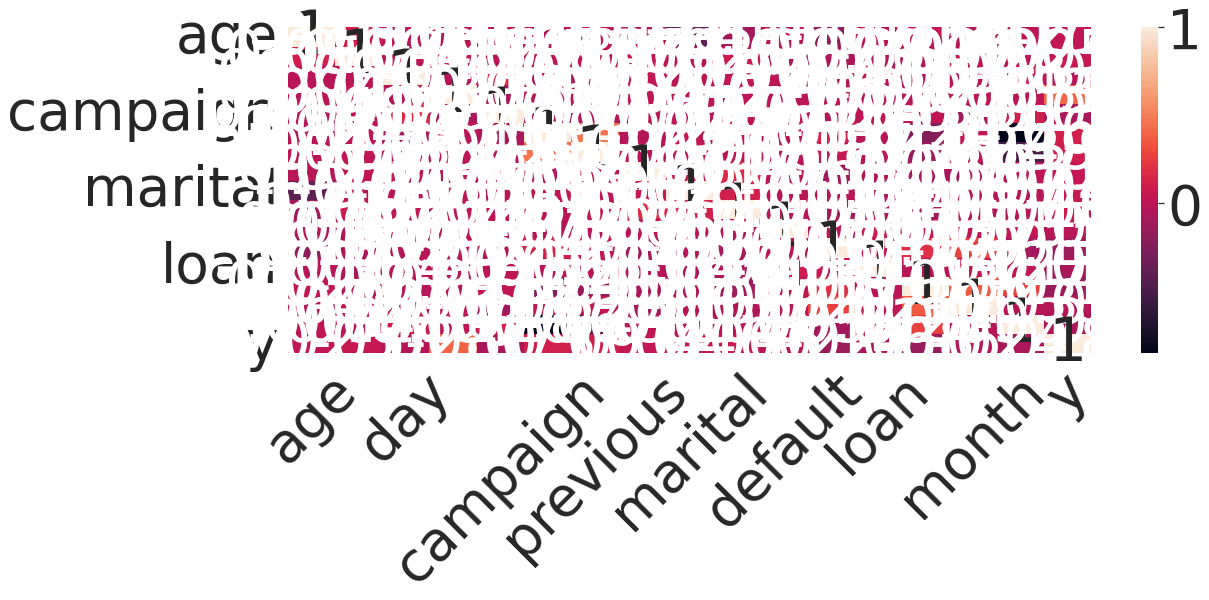

In [222]:
# making the heatmap of that 
fig= plt.figure(figsize=(18, 6))
sns.heatmap(banknew.corr(), annot=True);
plt.xticks(rotation=45);

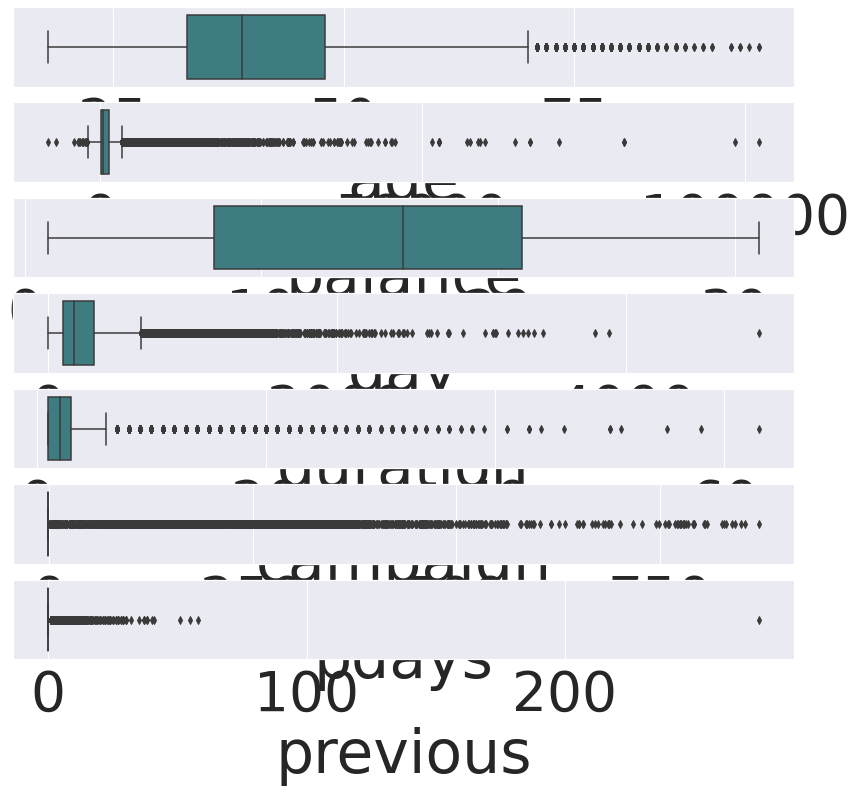

In [223]:
# creating box plot to find outlayers
ot=banknew.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [224]:
# as we can see we have so many outliers and droping them will leads to loss of data in very large amount which is not recommended 

In [225]:
df_new = banknew.copy()

In [229]:
#splitting dataset
X=df_new.drop('y',axis=1)    # input
Y=df_new['y']                # output

In [231]:
# training dataset
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [232]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [235]:
 #Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [237]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -1.82162004,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
        -0.16386856,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.82543321, -0.55964522]])

In [238]:
X_test

array([[-0.84184683, -0.55906114,  1.33899985, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.65371409, -0.64499209,  1.33899985, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.37860615,  0.37984514, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       ...,
       [ 0.66321505,  1.02672287,  0.61963382, ...,  1.49797145,
         0.83078232,  0.44805792],
       [ 0.38101594,  0.16454904,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [ 0.38101594, -0.34888836,  0.14005646, ..., -0.7181473 ,
        -1.82162004, -1.56734836]])

In [239]:
# Create the model of LofisticRegression, Why?
# Because we predict the output in Yes/no format as we have a classification type dataset.
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [240]:
# Create an object of LogisticRegression class
lr=LogisticRegression()

In [242]:
# To train the model with 70% data use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [243]:
# Test the model with 30% data use inbuilt method predict().
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [245]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)      # Score always varies between 0-1

0.8906373431920878

In [246]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [247]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647



In [248]:
print(confusion_matrix(Y_test,Y_pred))

[[27435   474]
 [ 2987   751]]


In [249]:
from sklearn.metrics import roc_auc_score, roc_curve

In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [252]:
# Prepare the data
X=df_new.drop('y',axis=1)    # input
Y=df_new['y']  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [253]:
# Build a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [254]:
# Predict the probabilities of the positive class
y_proba = clf.predict_proba(X_test)[:,1]

In [256]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [257]:
# Calculate the AUC
auc = roc_auc_score(y_test, y_proba)

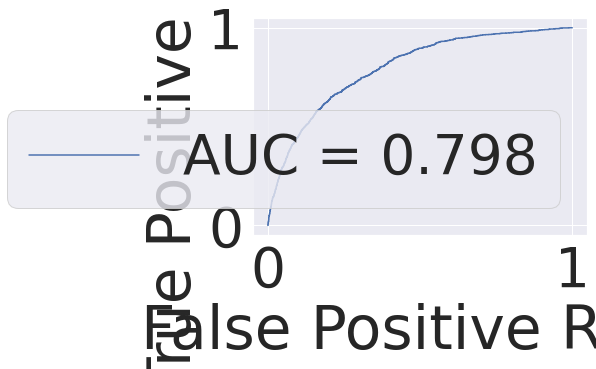

In [258]:
# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()